In [40]:
# import dependencies
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plotty
import missingno as msno
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

In [79]:
df = pd.read_pickle('../data/processed/numeric_only.pkl')

In [32]:
df.shape

(345551, 7)

In [36]:
df.describe()

,price_paid,property_type,new_build,estate_type,district,transaction_category,numcode_days_since
count,3.455510e+05,345551.000000,345551.000000,345551.000000,345551.000000,345551.000000,345551.000000
mean,8.919182e+05,1.791244,0.173540,0.696328,18.875787,0.178463,984.727267
std,4.413271e+06,1.257745,0.378714,0.459843,10.253242,0.382902,512.334337
min,1.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.499500e+05,1.000000,0.000000,0.000000,10.000000,0.000000,557.000000
50%,4.900000e+05,1.000000,0.000000,1.000000,21.000000,0.000000,963.000000
75%,7.500000e+05,3.000000,0.000000,1.000000,29.000000,0.000000,1411.000000
max,1.000000e+09,4.000000,1.000000,1.000000,33.000000,1.000000,2158.000000


In [8]:
df

,price_paid,property_type,new_build,estate_type,district,transaction_category,numcode_days_since
0,233500,1,0,1,31,0,1785
1,270000,1,0,1,31,0,213
2,176000,1,0,1,31,0,1618
3,450000,1,0,1,31,1,1180
4,440000,1,0,1,31,0,1233
5,430500,1,0,1,31,0,1746
6,390000,1,0,1,31,0,1808
7,490000,1,0,1,31,0,1189
8,455000,1,0,1,31,0,655
9,378000,1,0,1,31,0,596


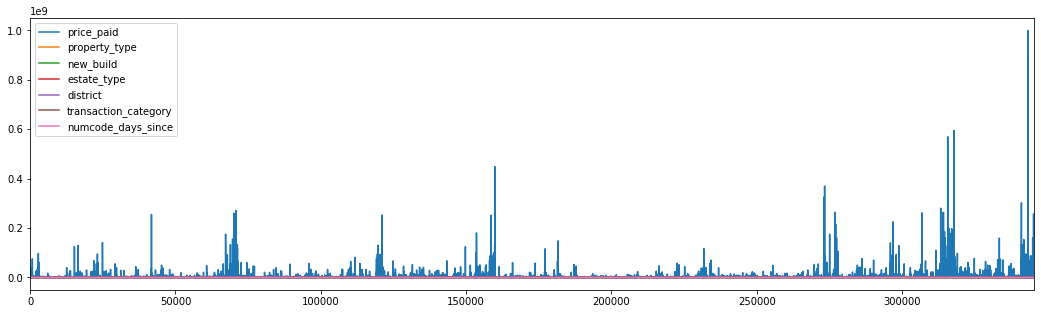

In [9]:
df.plot(figsize=(18,5))

In [10]:
df.isnull().values.any()

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1214b9dd8>,
      dtype=object)

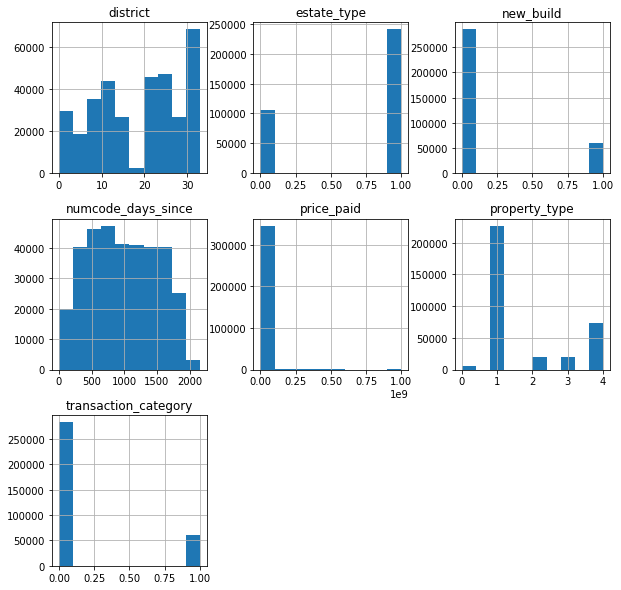

In [80]:
# View the distribution per feature
df.hist(figsize=(10,10))

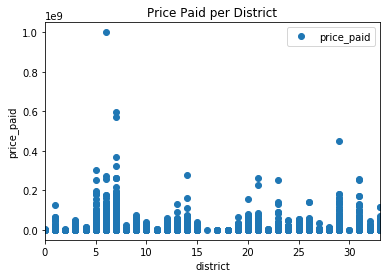

In [28]:
df.plot(x='district', y='price_paid', style='o')  
plotty.title('Price Paid per District')  
plotty.xlabel('district')  
plotty.ylabel('price_paid')  
plotty.show()

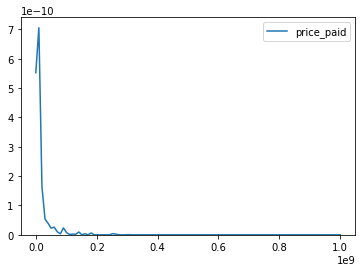

In [81]:
#Visualization of the distribtion of the prediction target
seabornInstance.kdeplot(df['price_paid'])

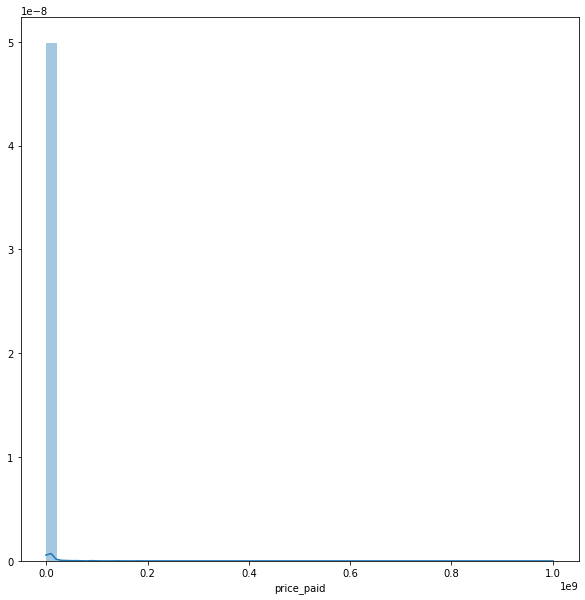

In [47]:
plotty.figure(figsize=(10,10))
plotty.tight_layout()
seabornInstance.distplot(df['price_paid'])

In [59]:
len(df.columns)

7

In [65]:
# Split data into predictors X and output Y
predictors = ['property_type', 'new_build', 'estate_type', 'district',
       'transaction_category', 'numcode_days_since']
X = df[predictors]
y = df['price_paid']

In [66]:
# Split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X_train, y_train)

print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 2310496.3006786583
betas = [-3.09618596e+05 -1.90914643e+04 -1.31127900e+06 -1.23503971e+04
  9.71972765e+05  1.09750927e+02]


In [70]:
# Plot the coefficient's chosen by the model for each variable
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
property_type,-3.096186e+05
new_build,-1.909146e+04
estate_type,-1.311279e+06
district,-1.235040e+04
transaction_category,9.719728e+05
numcode_days_since,1.097509e+02


In [73]:
y_pred = lm.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
246862,440000,4.252606e+05
112312,550000,1.912554e+06
293181,2475000,1.103912e+06
95596,592000,7.971924e+05
313960,712000,6.461992e+05
311426,1125000,9.457605e+05
195081,512500,5.285704e+05
31481,212000,4.331317e+05
43522,275000,3.394422e+05
288688,885000,4.678781e+05


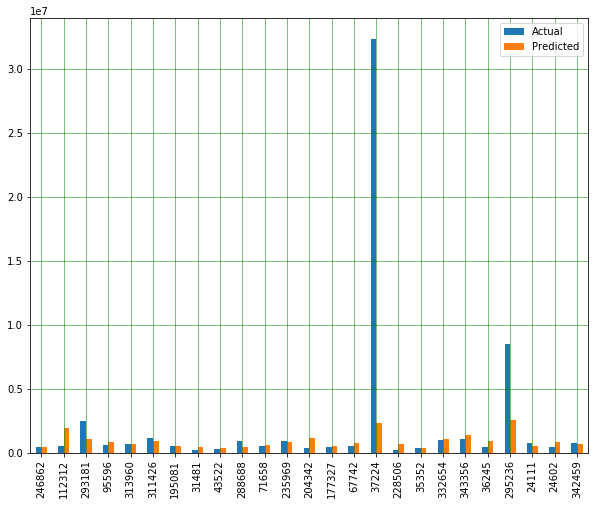

In [75]:
df1.plot(kind='bar',figsize=(10,8)) 
plotty.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plotty.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plotty.show()

In [76]:
# Evaluate the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 750092.2655091905
Mean Squared Error: 18962607368696.953
Root Mean Squared Error: 4354607.602149354


# credit
# [a beginners guide to linear regression](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)